In [1]:
## Damien notes
## consistencey of importances across models -- linear, forest, tree, linear svm, visualize!
## Visualization with matplotlib -- feature importances, correlations
## Slope graph

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('metis')
% matplotlib inline

OSError: 'metis' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [5]:
df = pd.read_pickle('03_mvp_pickle.pkl')
df.head()

,income,educ,oftvote,age,retired,student,employed,sav,econ_ineq,more_engaged_1,...,agnostic,relig_Other,nothing,christian,unitarian,republican,democrat,independent,party_none,party_other
0,3,5,1,68,1,3,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5,1,56,1,3,3,1,4,1,...,0,0,0,1,0,1,0,0,0,0
2,5,5,1,52,3,3,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,5,3,2,71,3,3,1,3,2,0,...,0,0,0,0,0,1,0,0,0,0
4,8,6,3,58,1,3,3,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Train/test split
X = df.drop('more_engaged_1', axis=1)
y = df.loc[:, 'more_engaged_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
# Scale
ssx = StandardScaler()
X_train_scaled = ssx.fit_transform(X_train)
X_test_scaled = ssx.transform(X_test)

In [8]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.284735,1.510575,0.205803,-0.125498,0.701845,0.306709,-0.996213,-1.052605,0.308767,-0.709650,...,-0.224356,-0.123025,-0.418592,-0.352918,-0.056614,1.660120,-0.707954,-0.750798,-0.151248,-0.065407
1,-0.701193,-1.091094,-0.676612,-1.804968,0.701845,0.306709,-0.996213,1.172260,0.308767,-0.709650,...,-0.224356,-0.123025,2.388963,-0.352918,-0.056614,-0.602366,1.412521,-0.750798,-0.151248,-0.065407
2,-0.701193,-1.091094,0.205803,1.665936,-1.380407,0.306709,1.172932,1.172260,1.480209,-0.709650,...,-0.224356,-0.123025,-0.418592,2.833522,-0.056614,-0.602366,-0.707954,1.331917,-0.151248,-0.065407
3,-0.701193,0.469907,1.088218,-1.189162,0.701845,0.306709,1.172932,0.059827,-0.862675,1.409146,...,-0.224356,-0.123025,-0.418592,-0.352918,-0.056614,-0.602366,-0.707954,1.331917,-0.151248,-0.065407
4,0.548181,1.510575,-0.676612,-0.797286,0.701845,0.306709,-0.996213,1.172260,-0.862675,-0.709650,...,4.457204,-0.123025,-0.418592,-0.352918,-0.056614,-0.602366,1.412521,-0.750798,-0.151248,-0.065407


In [9]:
knn_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train_scaled, y_train, cv=10).mean()
    knn_list.append((accuracy, k))
best = max(knn_list)
print('The best accuracy on the test set (' + str(best[0]) + ') comes from using a k of ' + str(best[1]))

names = ['knn', 'logreg', 'nb', 'svm', 'linear_svm', 'tree', 'forest']

knn = KNeighborsClassifier(n_neighbors=best[1])
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
linear_svm = LinearSVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

model_list = [knn, logreg, nb, svm, linear_svm, tree, forest]

for model, name in zip(model_list, names):
    print(name + ' accuracy: ' + str(cross_val_score(model, X_train_scaled, y_train, cv = 10).mean()))
    print(name + ' precision: ' + str(cross_val_score(model, X_train_scaled, y_train, cv = 10, scoring = 'precision').mean()))
    print(name + ' recall: ' + str(cross_val_score(model, X_train_scaled, y_train, cv = 10, scoring='recall').mean()))
    print(name + ' f1: ' + str(cross_val_score(model, X_train_scaled, y_train, cv = 10, scoring='f1').mean()))
    print(name + ' roc auc: ' + str(cross_val_score(model, X_train_scaled, y_train, cv = 10, scoring='roc_auc').mean()))


The best accuracy on the test set (0.5857520764592103) comes from using a k of 14
knn accuracy: 0.5857520764592103
knn precision: 0.6174488389153627
knn recall: 0.6579817027632562
knn f1: 0.6367804942962679
knn roc auc: 0.5981404921938903
logreg accuracy: 0.6006371600864717
logreg precision: 0.617773108800807
logreg recall: 0.7234503360716953
logreg f1: 0.6657025843785384
logreg roc auc: 0.6180997501689249
nb accuracy: 0.569214358857663
nb precision: 0.6093164298803699
nb recall: 0.6146004480955938
nb f1: 0.6104128327827316
nb roc auc: 0.5770394350794836
svm accuracy: 0.5958613039026055
svm precision: 0.6101115536658981
svm recall: 0.7455937266616879
svm f1: 0.6704439294579122
svm roc auc: 0.624581799672819
linear_svm accuracy: 0.6006286266924565
linear_svm precision: 0.6186063845107348
linear_svm recall: 0.7244025392083644
linear_svm f1: 0.6668015199370055
linear_svm roc auc: 0.617947828870159
tree accuracy: 0.561232790988736
tree precision: 0.594424731074642
tree recall: 0.5809652725

In [10]:
models = [
    ( 'logreg' , LogisticRegression ),
    ( 'svm' , SVC ),
    ( 'linear_svm' , LinearSVC )
]
params = [
    {'C' : np.logspace(-20, -16, 100),
     'penalty' : ['l2']
    },
    {'C' : np.linspace(0.1, 0.5, 100),
     'kernel' : ['rbf']#'linear', 'poly', ],
     #'degree' : range(1,6)
    },
    {'C' : np.linspace(0.0001, 0.01, 100),
     'penalty' : ['l2']
    }
]

grid_dict = {}
for model_tuple, param_set in zip(models, params):
    name, model = model_tuple
    grid = GridSearchCV(model(), param_set, n_jobs = -1)
    grid.fit(X_train_scaled, y_train)
    print(f'{name} best score: {grid.best_score_}')
    print(f'{name} best score parameters: {grid.best_params_}')
    grid_dict[name] = grid

logreg best score: 0.6022364217252396
logreg best score parameters: {'C': 1.6681005372000558e-18, 'penalty': 'l2'}
svm best score: 0.6080937167199149
svm best score parameters: {'C': 0.398989898989899, 'kernel': 'rbf'}
linear_svm best score: 0.6038338658146964
linear_svm best score parameters: {'C': 0.0017000000000000001, 'penalty': 'l2'}


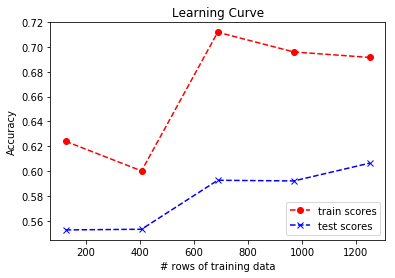

In [27]:
train_sizes, train_scores, test_scores = learning_curve(grid_dict['svm'], X_train_scaled, y_train)

ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)
learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label= 'train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label= 'test scores')
plt.xlabel('# rows of training data')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

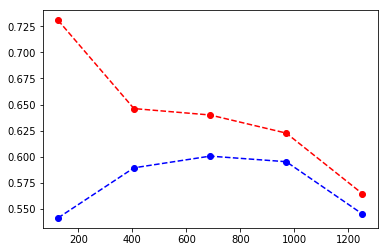

In [16]:
model_names_shapes = [('logreg', 'o'), ('svm', 'x')]#, ('linear_svm', '^')]


for model_shape in model_names_shapes:

    train_sizes, train_scores, test_scores = learning_curve(grid_dict[model_shape[0]], X_train_scaled, y_train)

    ave_train_scores = train_scores.mean(axis=1)
    ave_test_scores = test_scores.mean(axis=1)
    learn_df = pd.DataFrame({
        'train_size': train_sizes,
        'train_score': ave_train_scores,
        'test_score': ave_test_scores
    })

    plt.plot(learn_df['train_size'], learn_df['train_score'], f'r--{model_shape[1]}', label= f'{model_shape[0]} train scores')
    plt.plot(learn_df['train_size'], learn_df['test_score'], f'b--{model_shape[1]}', label= f'{model_shape[0]} test scores')
    plt.xlabel('# rows of training data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves')
    plt.legend(loc='upper left')

In [96]:
grid_dict.keys()

dict_keys(['logreg', 'svm', 'linear_svm'])

In [104]:
# Let's look at feature importance

logreg_imp_dict = {}
for feature, coef in zip(X.columns, grid_dict['logreg'].best_estimator_.coef_[0]):
    logreg_imp_dict[feature] = coef
logreg_imp_df = pd.Series(logreg_imp_dict)
logreg_order = logreg_imp_df.abs().sort_values(ascending = False)

print(logreg_order)

retired           2.102021e-16
employed          1.932603e-16
econ_ineq         1.922746e-16
sex_1             1.846343e-16
econ_unf_1        1.829419e-16
age               1.755157e-16
independent       1.693698e-16
democrat          1.648649e-16
oftvote           1.373535e-16
int_con_1         1.218482e-16
clear_sol_1       8.091502e-17
local_1           7.108489e-17
educ              6.935499e-17
pol_comp_1        6.866575e-17
party_none        6.551048e-17
sav               6.236285e-17
glob_econ_1       6.219016e-17
native            5.524798e-17
christian         4.526646e-17
race_other        4.101192e-17
relig_Other       3.718560e-17
unitarian         3.381616e-17
protestant        3.207312e-17
mormon            2.872247e-17
wlack             2.504312e-17
republican        2.442258e-17
white             2.223152e-17
student           2.221311e-17
hindu             1.786602e-17
jewish            1.747181e-17
income            1.429302e-17
muslim            1.120083e-17
atheist 

In [106]:
linear_svm_imp_dict = {}

for feature, coef in zip(X.columns, grid_dict['linear_svm'].best_estimator_.coef_[0]):
        linear_svm_imp_dict[feature] = coef
linear_svm_imp_df = pd.Series(linear_svm_imp_dict)
linear_svm_order = linear_svm_imp_df.abs().sort_values(ascending = False)
print(linear_svm_order)

white             0.153996
independent       0.129475
wlack             0.098876
native            0.091603
econ_unf_1        0.081959
nothing           0.081481
protestant        0.080751
econ_ineq         0.075390
retired           0.070357
sex_1             0.064445
roman Catholic    0.060674
local_1           0.059179
employed          0.056962
party_none        0.055258
christian         0.048770
democrat          0.048119
glob_econ_1       0.047928
relig_Other       0.046361
muslim            0.044362
asian             0.040593
agnostic          0.040146
int_con_1         0.039347
clear_sol_1       0.038628
orth Chr          0.034647
race_other        0.031307
atheist           0.030395
educ              0.028549
hindu             0.028046
mormon            0.023898
oftvote           0.022631
age               0.019897
unitarian         0.017540
republican        0.015219
sav               0.013928
party_other       0.013432
jewish            0.009049
income            0.008629
s

In [108]:
forest_importance_dict = {}
forest.fit(X_train_scaled, y_train)
for feature, importance in zip(X.columns, forest.feature_importances_):
    forest_importance_dict[feature] = importance
forest_importance_df = pd.Series(forest_importance_dict)
forest_order = forest_importance_df.sort_values(ascending = False)

print(forest_order)

age               0.161782
income            0.097477
educ              0.076881
econ_ineq         0.054930
oftvote           0.053229
sav               0.047151
employed          0.039189
sex_1             0.036291
clear_sol_1       0.033255
int_con_1         0.027903
pol_comp_1        0.027134
local_1           0.026811
glob_econ_1       0.025625
retired           0.024412
protestant        0.023715
econ_unf_1        0.022335
independent       0.020542
white             0.020184
republican        0.018253
student           0.017544
roman Catholic    0.016985
christian         0.016391
nothing           0.015892
democrat          0.015794
native            0.009397
wlack             0.008799
agnostic          0.008018
atheist           0.007564
race_other        0.006822
party_none        0.006479
asian             0.006250
mormon            0.005626
jewish            0.004821
relig_Other       0.003630
muslim            0.003371
party_other       0.002352
orth Chr          0.002119
b

In [21]:
best_grid = grid_dict['svm']
best_model = best_grid.best_estimator_
print('Accuracy: ' + str(cross_val_score(best_model, X_train_scaled, y_train, cv = 10).mean()))
print('Precision: ' + str(cross_val_score(best_model, X_train_scaled, y_train, cv = 10, scoring = 'precision').mean()))
print('Recall: ' + str(cross_val_score(best_model, X_train_scaled, y_train, cv = 10, scoring='recall').mean()))
print('F1: ' + str(cross_val_score(best_model, X_train_scaled, y_train, cv = 10, scoring='f1').mean()))
print('ROC AUC: ' + str(cross_val_score(best_model, X_train_scaled, y_train, cv = 10, scoring='roc_auc').mean()))


Accuracy: 0.6081010353851404
Precision: 0.6118109116643045
Recall: 0.7966486183719192
F1: 0.6916142573313733
ROC AUC: 0.6342247457235322


In [22]:
y_pred = best_model.predict(X_test_scaled)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
#print('ROC AUC: ' + ro
print(classification_report(y_test, y_pred))

Accuracy: 0.5598086124401914
             precision    recall  f1-score   support

          0       0.60      0.40      0.48       318
          1       0.54      0.72      0.62       309

avg / total       0.57      0.56      0.55       627



In [23]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

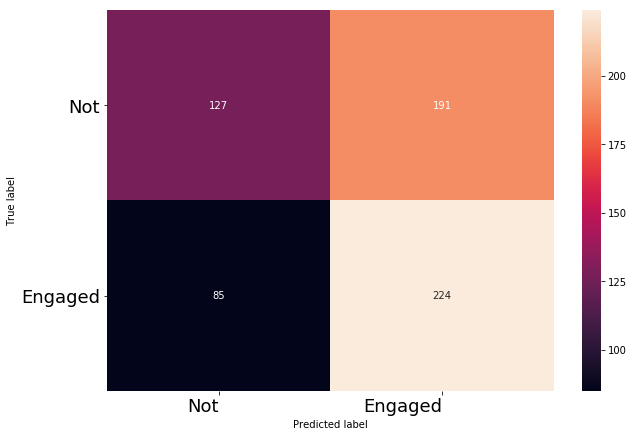

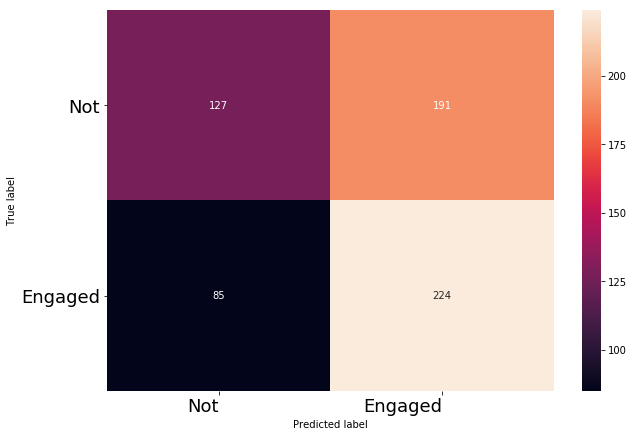

In [24]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print_confusion_matrix(conf_mat, ['Not','Engaged'])

In [15]:
#Retrain model on all data and save for export, using pipeline to incorporate scaling
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm', SVC(**grid_dict['svm'].best_params_, probability=True))])
pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [16]:
import pickle

pickle.dump(pipeline, open('model.pkl', 'wb'))

In [19]:
example_values = np.ones(len(X.columns))
columns = list(X.columns)
zipped = zip(columns, example_values)
example = dict(zipped)
example['age'] = 50
example

{'income': 1.0,
 'educ': 1.0,
 'oftvote': 1.0,
 'age': 50,
 'retired': 1.0,
 'student': 1.0,
 'employed': 1.0,
 'sav': 1.0,
 'econ_ineq': 1.0,
 'int_con_1': 1.0,
 'local_1': 1.0,
 'glob_econ_1': 1.0,
 'econ_unf_1': 1.0,
 'pol_comp_1': 1.0,
 'clear_sol_1': 1.0,
 'sex_1': 1.0,
 'white': 1.0,
 'wlack': 1.0,
 'asian': 1.0,
 'race_other': 1.0,
 'native': 1.0,
 'protestant': 1.0,
 'roman Catholic': 1.0,
 'mormon': 1.0,
 'orth Chr': 1.0,
 'jewish': 1.0,
 'muslim': 1.0,
 'buddhist': 1.0,
 'hindu': 1.0,
 'atheist': 1.0,
 'agnostic': 1.0,
 'relig_Other': 1.0,
 'nothing': 1.0,
 'christian': 1.0,
 'unitarian': 1.0,
 'republican': 1.0,
 'democrat': 1.0,
 'independent': 1.0,
 'party_none': 1.0,
 'party_other': 1.0}

In [29]:
X  = np.array([example[key] for key in example.keys()]).reshape(1, -1)
type(X)

numpy.ndarray

In [20]:
def make_prediction(features):
    X = np.array([features[column] for column in columns]).reshape(1,-1)
    prob_engaged = pipeline.predict_proba(X)[0, 1]
    
    result = {
        'prediction': int(prob_engaged > 0.5),
        'prob_engaged': prob_engaged
    }
    return result

In [21]:
make_prediction(example)

{'prediction': 1, 'prob_engaged': 0.5699887940835925}